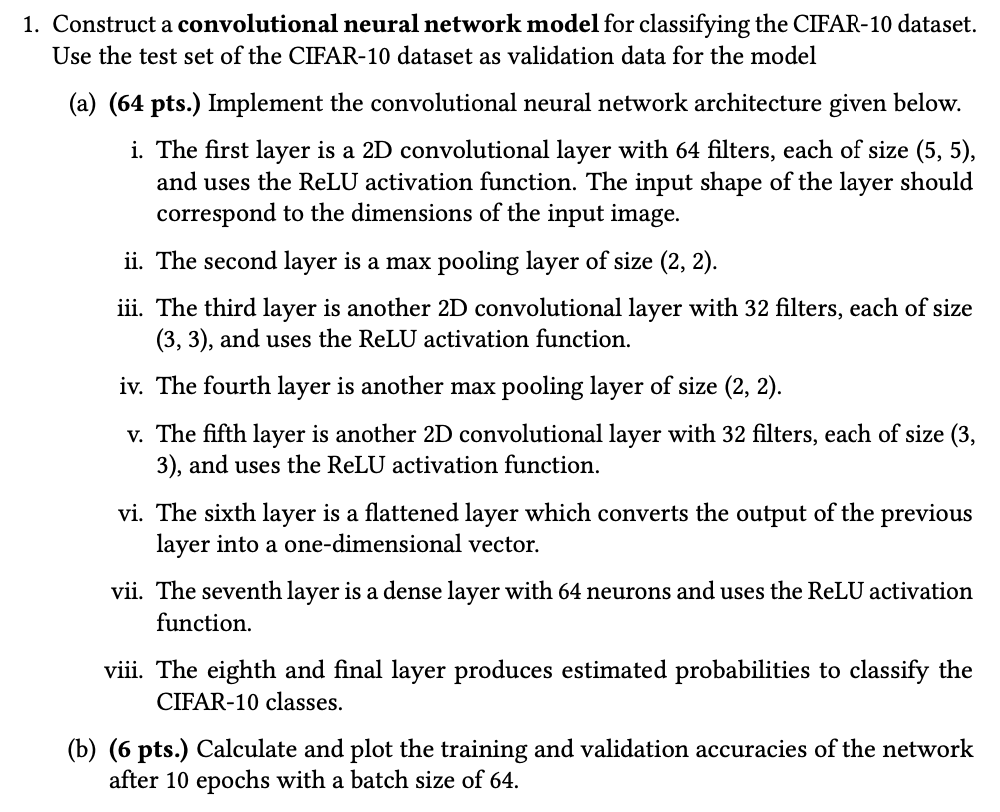

C:\Users\Jules\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 12, 12, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,058 (258.04 KB)

 Trainable params: 66,058 (258.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.3801 - loss: 1.6785 - val_accuracy: 0.4929 - val_loss: 1.4057
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.5129 - loss: 1.3511 - val_accuracy: 0.5321 - val_loss: 1.3105
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.5661 - loss: 1.2170 - val_accuracy: 0.5589 - val_loss: 1.2476
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.5981 - loss: 1.1335 - val_accuracy: 0.5924 - val_loss: 1.1684
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 31ms/step - accuracy: 0.6273 - loss: 1.0554 - val_accuracy: 0.6310 - val_loss: 1.0651
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.6494 - loss: 0.9918 - val_accuracy: 0.6378 - val_loss: 1.0313
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.6663 - loss: 0.9490 - val_accuracy: 0.6208 - val_loss: 1.0882
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - accuracy: 0.6766 - loss: 0.9152 - 

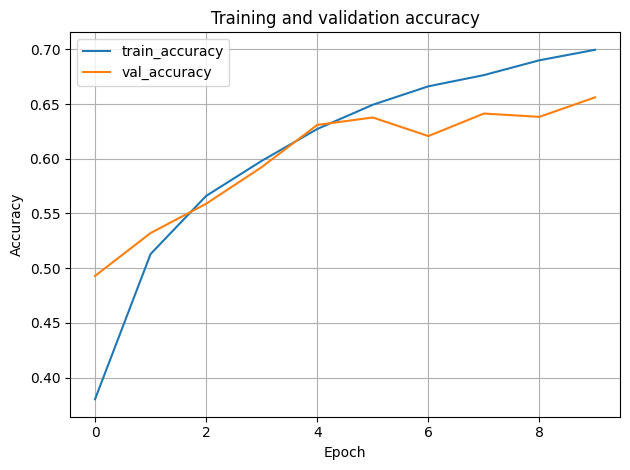

In [ ]:
# save as cifar10_cnn.py and run with: python cifar10_cnn.py
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# 1) Load CIFAR-10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# y_train/y_test shapes are (N,1); Keras sparse loss accepts them as-is
# 2) Normalize images to [0,1]
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# 3) Build model exactly as specified:
#    i) Conv2D with 64 filters, kernel (5,5), ReLU, input shape of CIFAR image s (32,32,3)
#    ii) MaxPool2D (2,2)
#    iii) Conv2D 32 filters (3,3), ReLU
#    iv) MaxPool2D (2,2)
#    v) Conv2D 32 filters (3,3), ReLU
#    vi) Flatten
#    vii) Dense 64 units, ReLU
#    viii) Dense 10 units, softmax (CIFAR-10 classes)
model = models.Sequential([
    layers.Conv2D(64, (5,5), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])f 

# 4) Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# 5) Train for 10 epochs, batch_size=64, use test set as validation_data
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_test, y_test)
)

# 6) Plot training and validation accuracies
plt.figure()
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


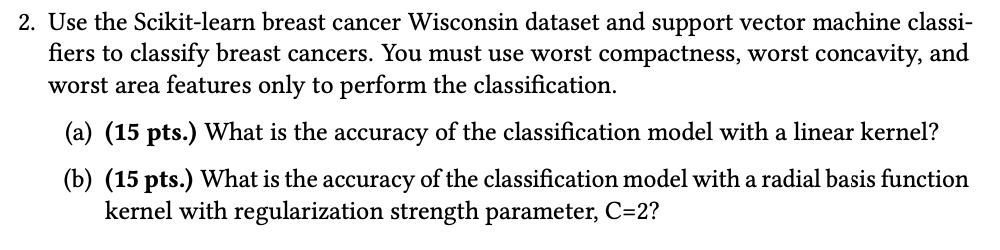

In [2]:
# svm_breast_cancer.py
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()

# Extract only the desired features
feature_names = ['worst compactness', 'worst concavity', 'worst area']
X = data.data[:, [list(data.feature_names).index(f) for f in feature_names]]
y = data.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# (a) Linear kernel SVM
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
acc_linear = accuracy_score(y_test, y_pred_linear)
print(f"(a) Accuracy with linear kernel: {acc_linear:.4f}")

# (b) RBF kernel SVM with C=2
svm_rbf = SVC(kernel='rbf', C=2, random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
acc_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"(b) Accuracy with RBF kernel (C=2): {acc_rbf:.4f}")


(a) Accuracy with linear kernel: 0.9912
(b) Accuracy with RBF kernel (C=2): 0.9649
